In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

from set_font import set_chinese_font
custom_font_path = 'Times_SimSun.ttf'
set_chinese_font(custom_font_path)

## 数据处理

In [2]:
poi = pd.read_csv('data/上海市2020年POI.zip', encoding='utf8')
road = gpd.read_file('data/路网.shp')
city = gpd.read_file('data/研究区.shp', encoding='utf-8')

<Axes: >

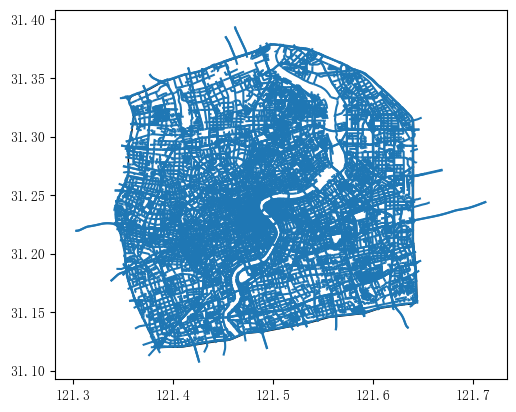

In [3]:
road.plot(ax=city.plot(color='white', edgecolor='black')) 

In [4]:
poi.drop(columns=['中类','小类'], inplace=True)
poi.rename(columns={'中类1':'中类','小类1':'小类'}, inplace=True)

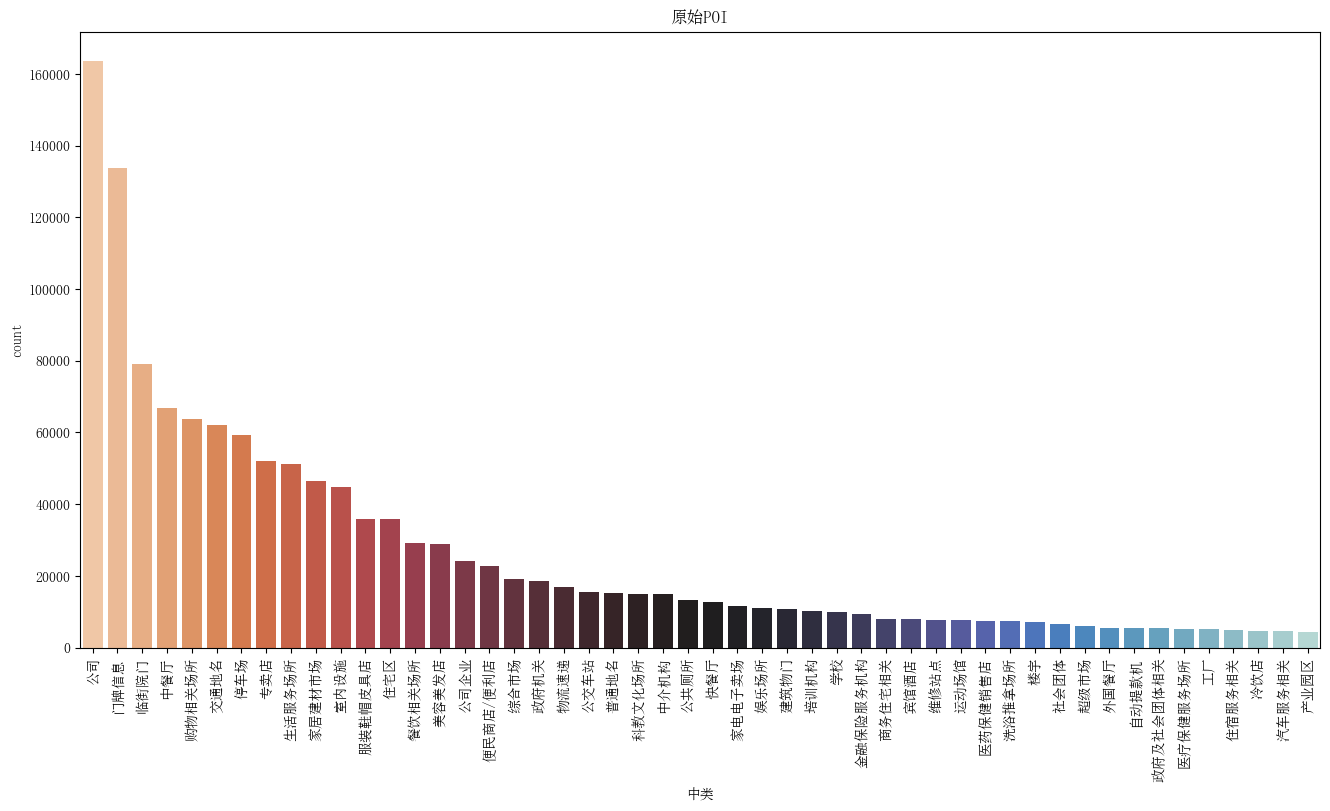

In [5]:
plt.figure(figsize=(16,8))
poi0 = poi.groupby(by='中类',as_index=False).agg({'小类':'count'}).rename(columns={'小类':'count'})
sns.barplot(x='中类', y='count', data=poi0.sort_values(by='count',ascending=False).head(50), hue='中类', palette='icefire_r')
plt.xticks(rotation=90)
plt.title('原始POI')
plt.show()

In [6]:
# 先过滤POI数据
DROP_1 = ['道路附属设施','地名地址信息','事件活动','室内设施','虚拟数据','通行设施','交通设施服务']  # 一类
DROP_2 = ['自动提款机','报刊亭']  # 二类
SAVE_2 = ['机场相关','火车站','长途汽车站']  # 二类

poi = poi[~poi['大类'].isin(DROP_1)]
poi = poi[~poi['中类'].isin(DROP_2) | poi['中类'].isin(SAVE_2)]

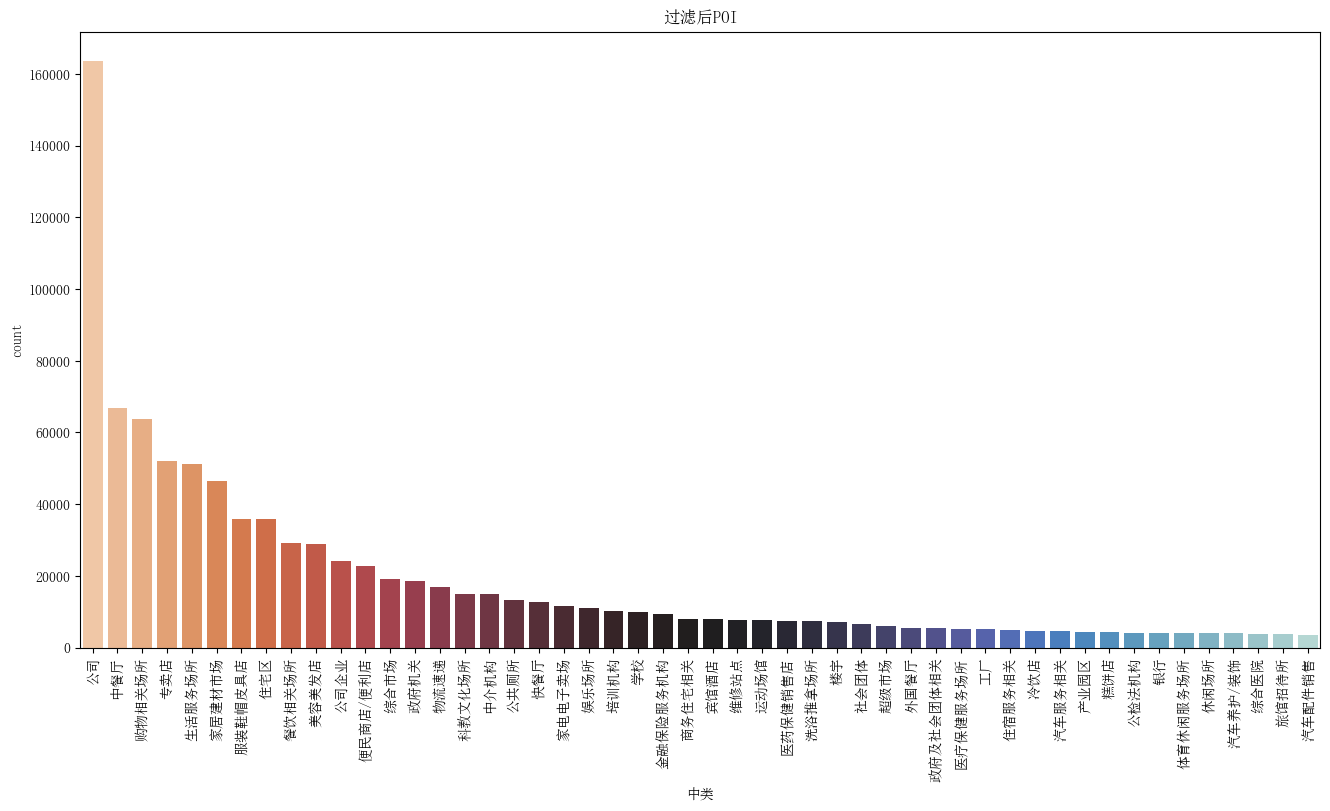

In [7]:
plt.figure(figsize=(16,8))
poi0 = poi.groupby(by='中类',as_index=False).agg({'小类':'count'}).rename(columns={'小类':'count'})
sns.barplot(x='中类', y='count', data=poi0.sort_values(by='count',ascending=False).head(50), hue='中类', palette='icefire_r')
plt.xticks(rotation=90)
plt.title('过滤后POI')
plt.show()

In [8]:
# poi转换为GeoDataFrame
poi = gpd.GeoDataFrame(poi, geometry=gpd.points_from_xy(poi['wgs84lon'], poi['wgs84lat']))

In [9]:
# 提取研究区内的POI
poi = poi.clip(city)

d:\Anaconda3\envs\py311\Lib\site-packages\geopandas\geodataframe.py:2379: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  return geopandas.clip(self, mask=mask, keep_geom_type=keep_geom_type)


<Axes: >

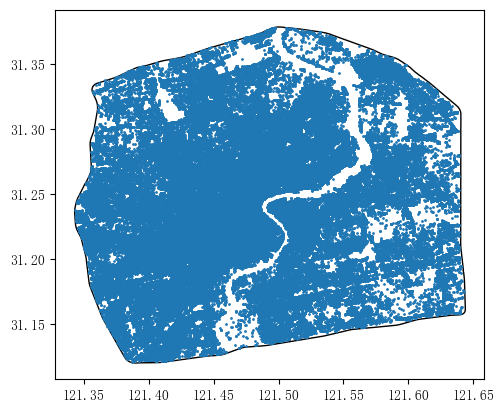

In [10]:
poi.plot(markersize=1, ax=city.plot(color='white', edgecolor='black'))

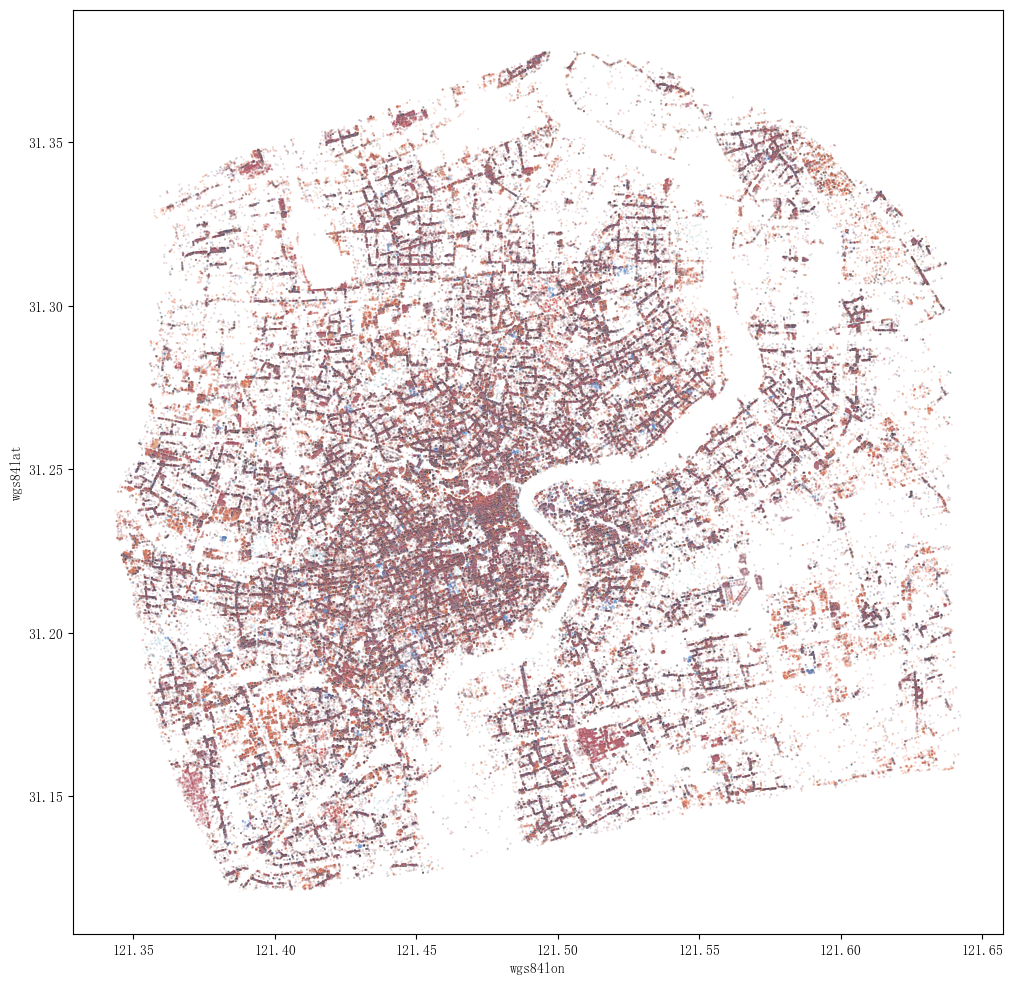

In [11]:
plt.figure(figsize=(12,12))
sns.scatterplot(x='wgs84lon', y='wgs84lat', data=poi, hue='大类', palette='icefire_r', s=2, alpha=0.2, legend=False)
plt.show()

## TAZ